In [1]:
#Importing all the stuff we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce

In [2]:
# coverage with old dataset (reads used in paper)
old1 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov1.txt', delimiter=',')
old =old1[['Scaffold','Fcov','Mcov54','ratio','chromosome']]
old

,Scaffold,Fcov,Mcov54,ratio,chromosome
0,JPZV02000012.1,2.4,4.3,1.719892,X
1,JPZV02000013.1,3.7,6.4,1.811733,X
2,JPZV02000014.1,2.0,5.1,2.201634,A
3,JPZV02000015.1,2.0,5.3,2.242857,A
4,JPZV02000034.1,13.0,8.2,0.514573,X
...,...,...,...,...,...
17649,KZ622727.1,2.8,12.0,2.921997,A
17650,KZ622728.1,5.1,19.0,2.830814,A
17651,KZ622729.1,3.9,14.0,2.790432,A
17652,KZ622730.1,11.0,32.0,2.807355,A


## Determine whether we have female or male reads from new dataset


In [3]:
## merge new coverage with previous assignment
## so that we know which scaffolds are assign as X or A for each individual
## devide by real male coverage (from old dataset)to get rid off bias
new1 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov2.txt', delimiter=',')
#indivFcov = new1[['Scaffold','Fcov','ratio_new']]
df = new1.merge(old, on='Scaffold')
df['log_fcov65'] = np.log2((df['Fcov65']+1)/(df['Mcov54']+1))
df['log_fcov66'] = np.log2((df['Fcov66']+1)/(df['Mcov54']+1))
df['log_fcov67'] = np.log2((df['Fcov67']+1)/(df['Mcov54']+1))
df['log_fcov68'] = np.log2((df['Fcov68']+1)/(df['Mcov54']+1))
df['log_mcov63'] = np.log2((df['Mcov63']+1)/(df['Mcov54']+1))
df['log_mcov64'] = np.log2((df['Mcov64']+1)/(df['Mcov54']+1))
df

,Scaffold,Length,Fcov65,Fcov66,Fcov67,Fcov68,Mcov63,Mcov64,femTotal,maleTotal,...,Fcov,Mcov54,ratio_y,chromosome,log_fcov65,log_fcov66,log_fcov67,log_fcov68,log_mcov63,log_mcov64
0,JPZV02000012.1,1169662,1.0,1.1,0.0,0.0,1.5,0.0,2.1,0.0,...,2.4,4.3,1.719892,X,-1.405992,-1.335603,-2.405992,-2.405992,-1.084064,-2.405992
1,JPZV02000013.1,1376873,1.0,1.1,1.0,0.0,1.1,0.0,3.1,0.0,...,3.7,6.4,1.811733,X,-1.887525,-1.817136,-1.887525,-2.887525,-1.817136,-2.887525
2,JPZV02000014.1,1402747,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,2.0,5.1,2.201634,A,-1.023847,-2.608809,-2.608809,-2.608809,-2.608809,-1.608809
3,JPZV02000015.1,1147640,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.3,2.242857,A,-1.655352,-2.655352,-2.655352,-2.655352,-2.655352,-2.655352
4,JPZV02000034.1,2160120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13.0,8.2,0.514573,X,-3.201634,-3.201634,-3.201634,-3.201634,-2.201634,-3.201634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,KZ622727.1,3779,11.0,7.7,12.0,12.0,12.0,7.1,42.7,14.2,...,2.8,12.0,2.921997,A,-0.115477,-0.579424,0.000000,0.000000,0.000000,-0.682518
17650,KZ622728.1,4649,18.0,15.0,22.0,20.0,17.0,12.0,75.0,24.0,...,5.1,19.0,2.830814,A,-0.074001,-0.321928,0.201634,0.070389,-0.152003,-0.621488
17651,KZ622729.1,11495,17.0,8.0,9.1,6.9,8.7,5.3,41.0,10.6,...,3.9,14.0,2.790432,A,0.263034,-0.736966,-0.570607,-0.925038,-0.628906,-1.251539
17652,KZ622730.1,38813,26.0,23.0,28.0,30.0,30.0,22.0,107.0,44.0,...,11.0,32.0,2.807355,A,-0.289507,-0.459432,-0.186413,-0.090198,-0.090198,-0.520832


In [4]:
## build a new datafame for each individual so we can plot each
## log2!
fcov65 = df[['Scaffold','log_fcov65','chromosome']]
fcov66 = df[['Scaffold','log_fcov66','chromosome']]
fcov67 = df[['Scaffold','log_fcov67','chromosome']]
fcov68 = df[['Scaffold','log_fcov68','chromosome']]
mcov63 = df[['Scaffold','log_mcov63','chromosome']]
mcov64 = df[['Scaffold','log_mcov64','chromosome']]

<AxesSubplot:xlabel='chromosome', ylabel='log_mcov64'>

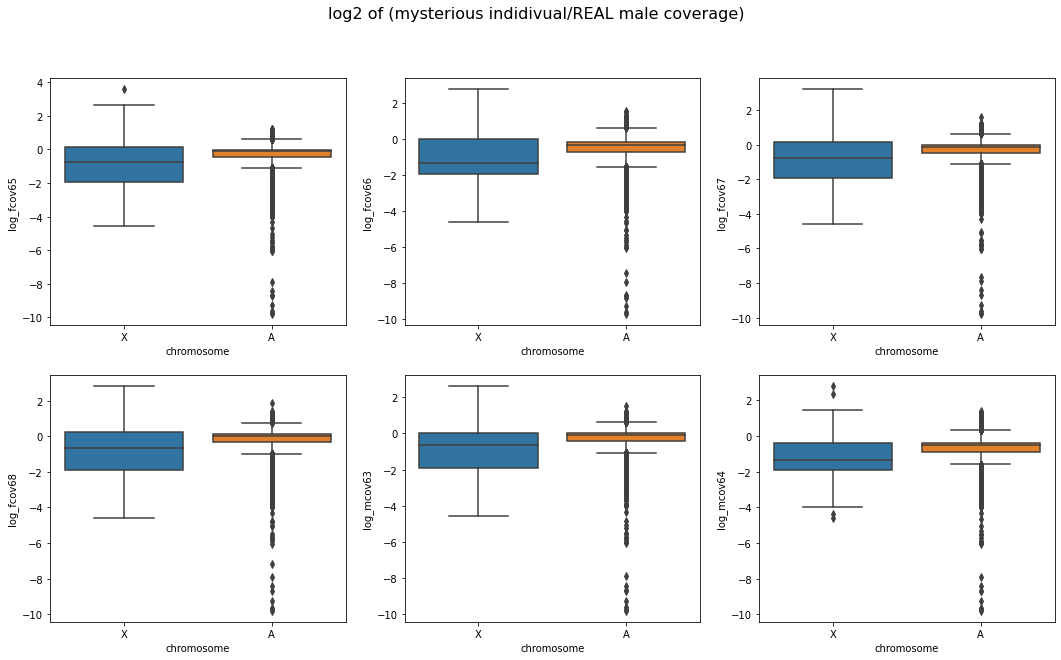

In [5]:
## the plot!
# Try to compare this ones but dividing by real female coverage
sns.color_palette("husl", 8)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('log2 of (mysterious indidivual/REAL male coverage)', fontsize=16)
sns.boxplot(ax=axes[0, 0], data=fcov65, x='chromosome', y='log_fcov65')
sns.boxplot(ax=axes[0, 1], data=fcov66, x='chromosome', y='log_fcov66')
sns.boxplot(ax=axes[0, 2], data=fcov67, x='chromosome', y='log_fcov67')
sns.boxplot(ax=axes[1, 0], data=fcov68, x='chromosome', y='log_fcov68')
sns.boxplot(ax=axes[1, 1], data=mcov63, x='chromosome', y='log_mcov63')
sns.boxplot(ax=axes[1, 2], data=mcov64, x='chromosome', y='log_mcov64')
## conclusion: these mysteriuos individuals are actually males!

In [6]:
## divide by real female coverage (from old dataset)
new1 = pd.read_table('/nfs/scistore18/vicosgrp/llayanaf/Scorpionflies/Cockroach/coverageAnalysis/mergecov2.txt', delimiter=',')
#indivFcov = new1[['Scaffold','Fcov','ratio_new']]
df = new1.merge(old, on='Scaffold')
df['log_fcov65'] = np.log2((df['Fcov65']+1)/df['Fcov'])
df['log_fcov66'] = np.log2((df['Fcov66']+1)/df['Fcov'])
df['log_fcov67'] = np.log2((df['Fcov67']+1)/df['Fcov'])
df['log_fcov68'] = np.log2((df['Fcov68']+1)/df['Fcov'])
df['log_mcov63'] = np.log2((df['Mcov63']+1)/df['Fcov'])
df['log_mcov64'] = np.log2((df['Mcov64']+1)/df['Fcov'])



<AxesSubplot:xlabel='chromosome', ylabel='log_mcov64'>

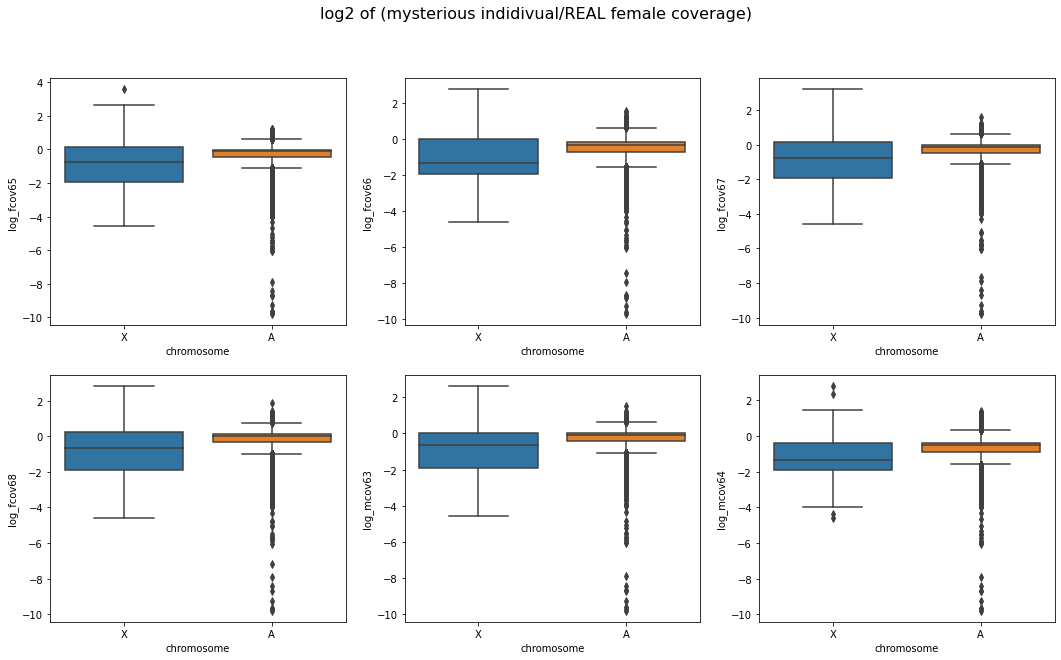

In [7]:
## the plot!
# Try to compare this ones but dividing by real female coverage
sns.color_palette("husl", 8)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('log2 of (mysterious indidivual/REAL female coverage)', fontsize=16)
sns.boxplot(ax=axes[0, 0], data=fcov65, x='chromosome', y='log_fcov65')
sns.boxplot(ax=axes[0, 1], data=fcov66, x='chromosome', y='log_fcov66')
sns.boxplot(ax=axes[0, 2], data=fcov67, x='chromosome', y='log_fcov67')
sns.boxplot(ax=axes[1, 0], data=fcov68, x='chromosome', y='log_fcov68')
sns.boxplot(ax=axes[1, 1], data=mcov63, x='chromosome', y='log_mcov63')
sns.boxplot(ax=axes[1, 2], data=mcov64, x='chromosome', y='log_mcov64')
## conclusion: these mysteriuos individuals are actually males!